In [330]:
import numpy as np                                             
import pandas as pd 
          

In [331]:
df=pd.read_csv("spam.csv", encoding='ISO-8859-1')

In [332]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [333]:
df.shape



(5572, 5)

Data cleaning 

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [335]:
# drop last 3 col from last
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [337]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [338]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [339]:
df['v1']=encoder.fit_transform(df['v1'])

In [340]:
df.sample(5)

,v1,v2
4602,0,And I don't plan on staying the night but I pr...
2497,0,Dai what this da.. Can i send my resume to thi...
136,0,He is there. You call and meet him
4233,0,Now only i reached home. . . I am very tired n...
1067,0,Meeting u is my work. . . Tel me when shall i ...


check for Missing values

In [341]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

Check for duplicates value

In [342]:
df.duplicated().sum()

403

In [343]:
#remove mising value
data=df.drop_duplicates(keep='first')

In [344]:
data.duplicated().sum()

0

In [345]:
data.shape

(5169, 2)

EDA

In [346]:
data['v1'].value_counts()

0    4516
1     653
Name: v1, dtype: int64

c:\Users\anand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='v1', ylabel='count'>

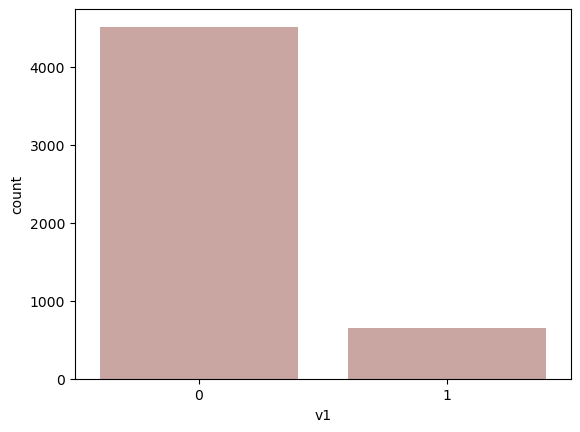

In [347]:
 import seaborn as sns
 sns.countplot(data['v1'],color="salmon",saturation = 0.3)

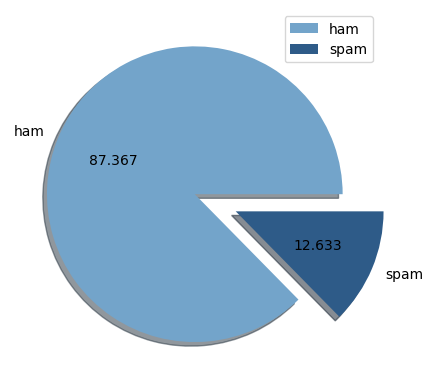

In [348]:
import matplotlib.pyplot as plt
explode = (0, 0.3)
colors = ["#73A4CA", "#2E5B88"]
plt.pie(data['v1'].value_counts(),labels=['ham','spam'],autopct="%0.3f", explode=explode, shadow=True,colors=colors)
plt.legend()
plt.show()

In [349]:
#data is imbalanced
import nltk


In [350]:
#pip install nltk

In [351]:
#nltk.download('punkt')

In [352]:
data['v2']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5169, dtype: object

In [353]:
#no of charaters
data['num_characters']=data['v2'].apply(len)


C:\Users\anand\AppData\Local\Temp\ipykernel_17548\1001864294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_characters']=data['v2'].apply(len)


In [354]:
data.head()

,v1,v2,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [355]:
#no of words
data['v2'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: v2, Length: 5169, dtype: object

In [356]:
data['num_words']=data['v2'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\anand\AppData\Local\Temp\ipykernel_17548\2601241509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_words']=data['v2'].apply(lambda x: len(nltk.word_tokenize(x)))


In [357]:
data.head(5)

,v1,v2,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [358]:
data['num_sentences']=data['v2'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\anand\AppData\Local\Temp\ipykernel_17548\3166937282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_sentences']=data['v2'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [359]:
data.head(5)

,v1,v2,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [360]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [361]:
#ham
data[data['v1']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [362]:
#spam
data[data['v1']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [363]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

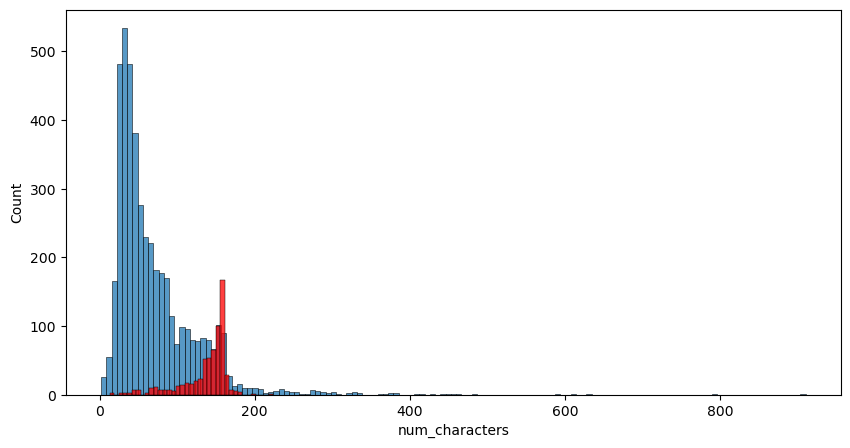

In [364]:
plt.figure(figsize=(10,5))
sns.histplot(data[data['v1']==0]['num_characters'])
sns.histplot(data[data['v1']==1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

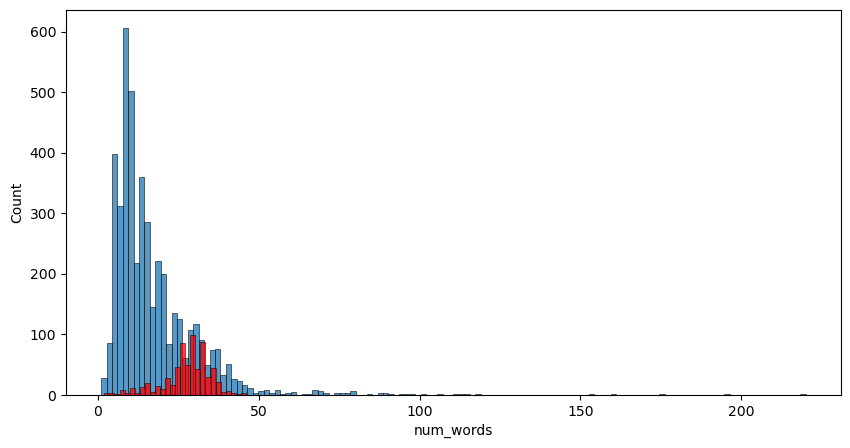

In [365]:
plt.figure(figsize=(10,5))
sns.histplot(data[data['v1']==0]['num_words'])
sns.histplot(data[data['v1']==1]['num_words'],color='red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

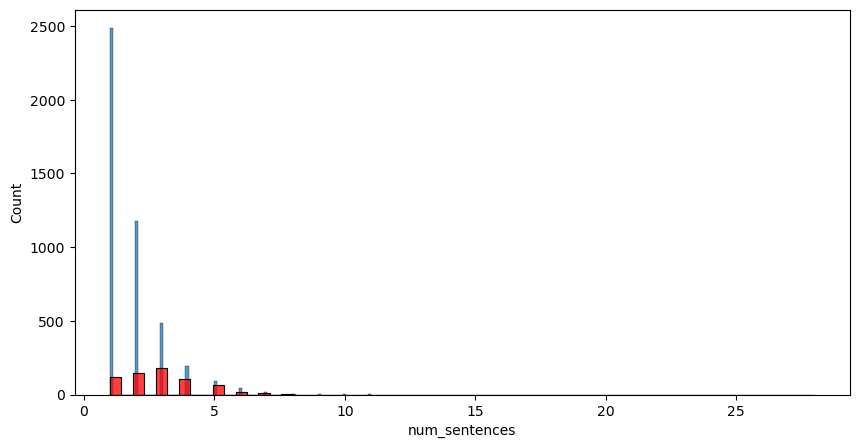

In [366]:
plt.figure(figsize=(10,5))
sns.histplot(data[data['v1']==0]['num_sentences'])
sns.histplot(data[data['v1']==1]['num_sentences'],color='red')

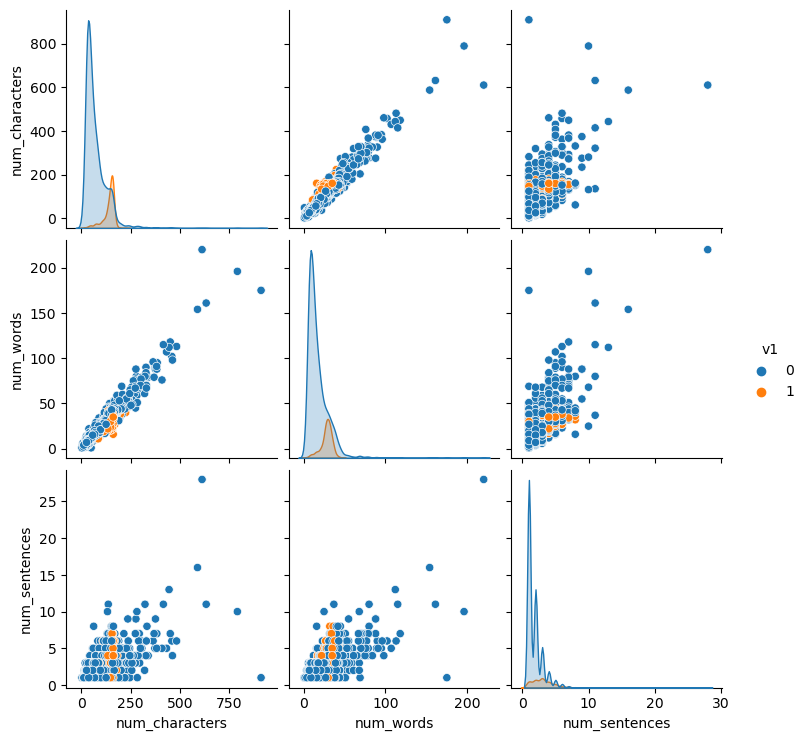

In [367]:
sns.pairplot(data,hue='v1')

In [368]:
data.corr()

,v1,num_characters,num_words,num_sentences
v1,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

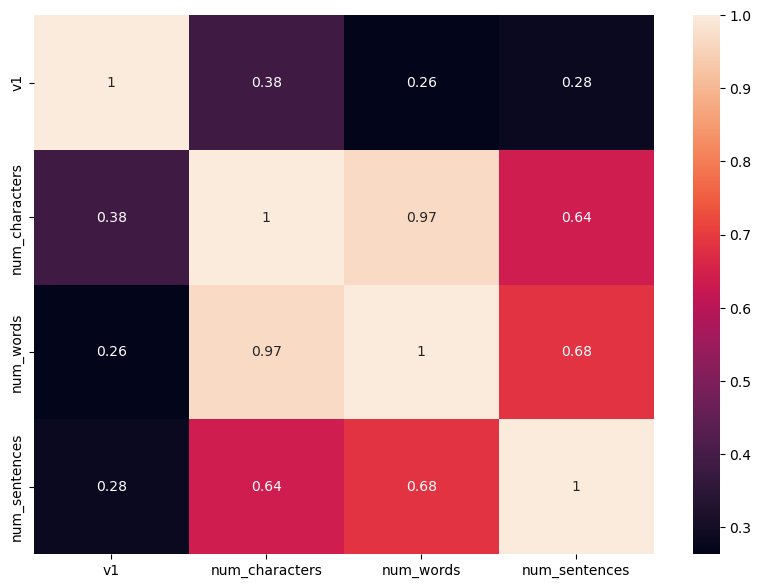

In [369]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)


Data/Text preprocessing
. Lower case:- Converting of data into lower case

. Tokenization:- Breaking sentences into words

. removing special Character

. Removing Stopwords and punctuation:-removal of words like is, are, am 

. stemming/Lamitization:- Removal of words with same meaaning like read,reading, read 


In [370]:
def transform_text(v2):
    v2=v2.lower()
    v2=nltk.word_tokenize(v2)
    y=[]
    for i in v2:
        if i.isalnum():
            y.append(i)
    
    v2=y[:]
    y.clear()
    
    for i in v2:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    v2= y[:]
    y.clear()
    
    for i in v2:
        y.append(ps.stem(i))
    return " ".join(y)

In [371]:
transform_text('Hi@HOW ARE minu?')

'hi minu'

In [372]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [373]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [374]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [375]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('eating')

'eat'

In [376]:
data['transform_text']=data['v2'].apply(transform_text)

C:\Users\anand\AppData\Local\Temp\ipykernel_17548\4045658277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transform_text']=data['v2'].apply(transform_text)


In [377]:
data.head(5)

,v1,v2,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [378]:
from wordcloud import WordCloud
wc = WordCloud(width=50, height=50, min_font_size=10, background_color='white')


In [379]:
#filtering out spam text
spam_wc=wc.generate(data[data['v1']==1]['transform_text'].str.cat(sep=" "))

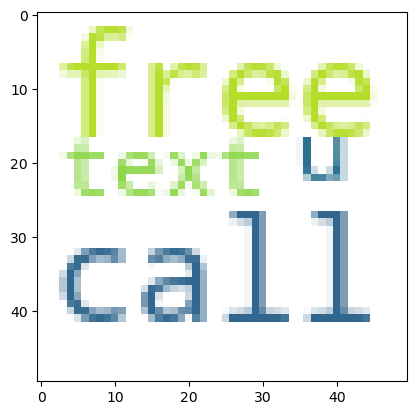

In [380]:
plt.imshow(spam_wc)

In [381]:
#filtering out ham text
ham_wc=wc.generate(data[data['v1']==0]['transform_text'].str.cat(sep=" "))

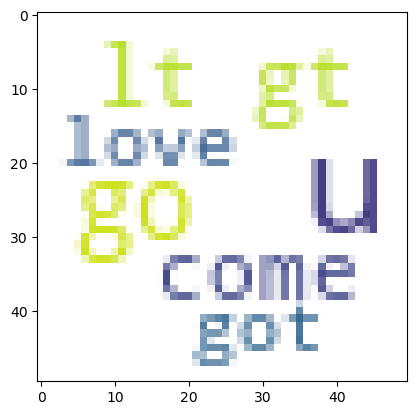

In [382]:
plt.imshow(ham_wc)

In [383]:
spam_corpus=[]
for msg in data[data['v1']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [384]:
print(spam_corpus)


['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18', 'freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour', 'mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030', 'six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info', 'urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18', 'xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'click',

In [385]:
len(spam_corpus)

9939

In [386]:
from collections import Counter
import pandas as pd
pd.DataFrame(Counter(spam_corpus).most_common(30))[0]

0        call
1        free
2           2
3         txt
4        text
5           u
6          ur
7       mobil
8        stop
9       repli
10      claim
11          4
12      prize
13        get
14        new
15     servic
16       tone
17       send
18     urgent
19      nokia
20    contact
21      award
22      phone
23       cash
24      pleas
25       week
26        win
27          c
28    collect
29        min
Name: 0, dtype: object

In [387]:
ham_corpus=[]
for msg in data[data['v1']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [388]:
len(ham_corpus)

35394

In [389]:
print(ham_corpus)

['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat', 'ok', 'lar', 'joke', 'wif', 'u', 'oni', 'u', 'dun', 'say', 'earli', 'hor', 'u', 'c', 'alreadi', 'say', 'nah', 'think', 'goe', 'usf', 'live', 'around', 'though', 'even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent', 'per', 'request', 'mell', 'oru', 'minnaminungint', 'nurungu', 'vettam', 'set', 'callertun', 'caller', 'press', '9', 'copi', 'friend', 'callertun', 'gon', 'na', 'home', 'soon', 'want', 'talk', 'stuff', 'anymor', 'tonight', 'k', 'cri', 'enough', 'today', 'search', 'right', 'word', 'thank', 'breather', 'promis', 'wont', 'take', 'help', 'grant', 'fulfil', 'promis', 'wonder', 'bless', 'time', 'date', 'sunday', 'oh', 'k', 'watch', 'eh', 'u', 'rememb', '2', 'spell', 'name', 'ye', 'v', 'naughti', 'make', 'v', 'wet', 'fine', 'thatåõ', 'way', 'u', 'feel', 'thatåõ', 'way', 'gota', 'b', 'serious', 'spell', 'name', 'go', 'tri', '2', 'month', 'ha', 

In [390]:
from collections import Counter
import pandas as pd
pd.DataFrame(Counter(ham_corpus).most_common(30))[0]

0         u
1        go
2       get
3        gt
4        lt
5         2
6      come
7       got
8      know
9      like
10     call
11     time
12       ok
13     love
14     good
15     want
16       ur
17      day
18     need
19      one
20      lor
21        4
22     home
23    think
24      see
25     take
26    still
27       da
28     tell
29     make
Name: 0, dtype: object

In [391]:
#text vectorization
#usng bag of words


In [392]:
#model building
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()


In [393]:
#tfidf vectorizaton model
x=tfidf.fit_transform(data['transform_text']).toarray()


In [394]:
x.shape

(5169, 6708)

In [395]:
y=data['v1'].values

In [396]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [397]:
from sklearn.model_selection import train_test_split

In [398]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [399]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [400]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [401]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
0.5231481481481481


In [404]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [403]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
0.9734513274336283


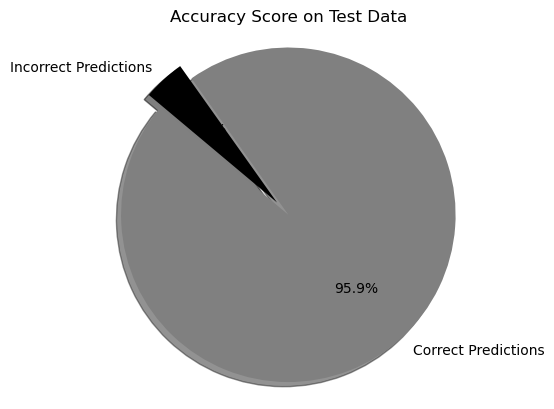

In [415]:

test_data_accuracy = 0.9593810444874274

# Create a pie chart
labels = ['Correct Predictions', 'Incorrect Predictions']
sizes = [test_data_accuracy, 1 - test_data_accuracy]
colors = ['grey', 'black']
explode = (0.1, 0) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  

plt.title('Accuracy Score on Test Data')
plt.show()